<a href="https://colab.research.google.com/github/D-US/ULB-ALGORITHMS-FOR-BIG-DATA-PROJECT/blob/main/BIG_DATA_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GROUP MEMBER NAMES:

1) Carlo FABRIZIO -000554019 

2) Ulrich Steve Domkap Njomou - 000534415



[LINK TO THE PAPER](https://www.nature.com/articles/s41598-017-11873-y.pdf)

#  ESTIMATING THE INTRINSIC DIMENSION OF DATASETS BY MINIMAL NEIGHBORHOOD INFORMATION 

### 1) What is the intrinsic dimension (ID) of a dataset and why is important to assess it.


One of the principal issues related to recent real data science problem is dealing with large volumes of high-dimensional data. Text mining , Bioinformatics and immage analysis are examples of data scienze tasks where the number of observations is equal or even less the number of features.</br>
The resulting problems are different:

* A.  High computational cost

* B.  High risk of overfitting concerning Machine learning field

* C.  Impossibility to compute a linear regression model.
Since high dimensional dataset tends to present multicollinearity, the element $(X^T * X)^{-1}$ in the Least-squares solution ($\hat{\beta}=(X^T * X)^{-1}*X^T*Y$) could be singolar.

* D.  Data understanding and visualization

* E. Curse of dimensionality

</br>
It is clear the importance of a Dimensionality reduction approach to these tasks.</br>

The "Intrinsic dimension" (ID) is the number of variables needed in the minimal and accurate representation of dataset.
The "Intrinsic dimension" approaches are based on the assumption that the important content of a dataset belong to a manifold, whose dimension is the Intrinsic dimension.(In mathematics, a manifold is a topological space that locally resembles Euclidean space near each point) However, this manifold is tipically twisted and curved and, in addition, points on it will be non-uniformly distributed: this two factors make the identification of the (ID) really hard. 










### 2) Existing approaches

* A.  Projection techniques.
Find the best subspace to project the data by minimizing a projection error or by preserving pairwise distances (PCA)

* B.  Fractal methods.
Considering an high dimensional dataset and a point (xq)in it (local model). Create d-dimensional ball of radius R centred in the point xq and assess the number of points (*count*) in the ball with respect to d (and R<font color="red">?</font>). Estimate the rate of growing of *count*. (Fix a threshold to the growth reduction)
These methods have the limitations that, in order to keep a fixed number of neighbors in the ball,the number of points in the space grow exponentially with respect to the dimension.

* C. Nearest-Neighbors-based ID estimators describe the neighborhood distribution as a function of the ID, assuming a uniform distribution of points in a small neighobrood of a point.


### 3) Proposed approach TWO-NN

Assess the ID, using a new ID estimator based only on the distance of the first and the second nearest neighbor of each point in the sample. This minimality allows to reduce the effect of curvature and of density variation, resulting in computational cost.</br>

If the density is approximately constant
on the lengthscale defined by the typical distance to the second neighbor it is possible to compute the distribution
and the cumulative distribution of the ratio of the second distance to the first one, and it turns out that they are
functions of the intrinsic dimension d but not of the density; at this point an equation is obtained that links the
theoretic cumulate F to d, and by approximating F with the empirical cumulate obtained on the dataset we are
able to estimate the intrinsic dimension.




This apporach can be effectively used in combo with Clustering in order to reduce the noise of an high-dimensional dataset.


**MATH ANALYSIS**

A. Definitions:
- $d$ is the intrinsic dimension
- $i$ data point in the dataset
- $r_{j}$ distance between i and its $j$-th nearest neighbor ($r_{0}$=0)
- $\omega_{d}$ is the volume of a d-sphere with unitary radius
- $\Delta v_{l}=\omega_{d}(r_{l}^d -r_{l-1}^{d})$ is the volume of the hyperspherical shell enclosed between two successive neighbors $l$ and $l$-1

B. Hypotesis:
The density is approximately constant
on the lengthscale defined by the typical distance to the second neighbor.

C.Tesis:
The cumulative distribution of the ratio of the second distance to the first one is assessable and it is a function of $\hat{d}$, and so it is possible to compute $\hat{d}$:

$$\hat{d}=\tfrac{-log(1-F(\mu))}{log(\mu)}$$


C. Analysis:

Considering the set of $\Delta v_{l}$ for $i$=1,...,K, it can be proved that, if the density around the point i is constant ($\rho$, all the $\Delta v_{l}$ are independently drawn from an exponential distribution with expected value equal to $\tfrac{1}{\rho}$:
$$P(\Delta v_{l}\in [v,v+dv])=\rho e^{-\rho v} dv$$.

Let $R$=$\tfrac{\Delta v_{i}}{\Delta v_{j}}$, from the previous consideration it is possible to compute exactly the probability distribution of $R$:

$$P(R\in [\bar{R},\bar{R}+d\bar{R}])=\int_{0}^{\infty }\int_{0}^{\infty }\rho e^{-\rho v_{i}}\rho e^{-\rho v_{j}} 1_{{\frac{v_{i}}{vj}[\bar{R},\bar{R}+d\bar{R}]}}dv_{i}dv_{j}=d\bar{R}\tfrac{1}{(1+R)^2}$$

where $1_{{\frac{v_{i}}{vj}[\bar{R},\bar{R}+d\bar{R}]}}$ is the indicator function  that takes value 1 if $\frac{v_{i}}{vj} \in [\bar{R},\bar{R}+d\bar{R}]$.
Dividing the result by $d\bar{R}$ we obtain the probability distribution:
$$g(R)=\tfrac{1}{(1+R)^2}.$$
The distribution doesn't depend explicitly on the dimension $d$ but, defining $\mu=\tfrac{r_{1}}{r_{2}} \in [1,+\infty[$, $\mu$ and $R$ are related by the equality:
$$ R=\mu^d-1$$

And so we can exactly compute the probability distribution and the cumulative distribution of $\mu$:
</br>
Probability distribution
$$ f(\mu)=d\mu^{-d-1} 1_{\mu[1,+\infty]}$$ 
</br>
Cumulative distribution
$$F(\mu)=\int_{1}^{\infty}f(\mu)d\mu=(1-\mu^{-d})1_{\mu[1,+\infty]}$$

It can be seen that $F(\mu)$ and $f(\mu)$ depend on $d$ but not on the local density.

C. Computation of $\hat{d}$

From the cumulative distribution formula we can derive $\hat{d}$:

$$F(\mu)=(1-\mu^{-d})\to   \mu^{-d}=1-F(\mu)  \to -d=log_{\mu}(1-F(\mu)))\to d=\tfrac{-log(1-F(\mu))}{log(\mu)}$$

where d is the intrinsic dimension (this value of d is able to keep safe the ratio between the first and the second neighbor of each datapoint, in terms of probability)









### 4) Implementation

##### 4.1. Importing packages

In [ ]:
from numpy.random import seed
from numpy.random import normal
import numpy
import matplotlib.pyplot as plt
from sklearn import metrics as met
import pandas as pd
import random
import array
import sys
import statistics as stat
import tracemalloc
import timeit



In [ ]:
 
!pip install scikit-dimension

from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import johnson_lindenstrauss_min_dim

import skdim
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#import timeit
from timeit import default_timer as timer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##### 4.2. Creation of a dataset to test the method on


In [ ]:


# Make this example reproducible
seed(1)

# Creation of a dataset
Dataset=[]

Nrows=1000

Ncols=10000

for  i in range(Nrows) :

   
   # data = normal(loc=random.randint(1,10), scale=random.randint(1,10), size=Ncols)
    data=numpy.random.uniform(random.randint(-10,-1),random.randint(1,10),Ncols)
    Dataset.append(data)




#view first six values
Dataset=pd.DataFrame(Dataset)

In [ ]:
Dataset

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.668088,1.881298,-0.999543,0.209330,-0.412976,-0.630646,-0.254959,0.382243,0.587070,1.155267,...,1.346394,2.461181,2.986276,2.460432,-0.283270,1.778656,0.184925,-0.761865,-0.567825,2.051175
1,-0.172515,-2.459136,-0.323111,0.060992,-2.816528,-3.685881,-0.889780,0.719689,-2.261695,-1.831869,...,-1.423138,0.124723,-0.365102,-1.492760,-3.738270,-3.125277,-1.733239,-3.774055,-0.517359,-2.501786
2,0.863822,-2.042539,1.667754,2.422885,1.160693,2.986730,-2.578756,-3.600230,-6.129523,-4.029196,...,-3.993186,-3.903090,-1.866765,-3.171992,2.538156,-0.685277,-5.014457,-3.330949,2.672478,-2.169319
3,-1.203298,1.725152,1.176701,-2.394878,-1.120534,0.531689,1.853758,0.222103,-0.060977,0.641667,...,-0.345665,1.190900,-1.092734,0.135252,-2.169179,0.091181,-2.660754,0.295784,-0.022794,-1.821595
4,0.514903,-2.832240,-0.272499,-0.991728,-2.407037,-2.968851,0.339826,-1.256465,-0.688541,-0.943023,...,0.696181,0.150365,-0.828399,0.334246,-0.519237,-1.390126,-1.011917,0.059588,-2.851211,0.516742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.154576,5.307347,2.495497,7.430083,-4.391885,1.319745,3.174935,4.645902,0.301834,4.437367,...,-4.362122,7.616069,7.002445,7.069553,1.056457,3.269080,-4.026961,5.682020,-0.710197,1.048443
996,3.195071,2.444263,1.214701,-0.151100,-0.814724,-0.182167,0.431805,4.263096,-0.116728,3.422555,...,-0.972253,2.405628,2.467634,-3.595746,-3.060931,1.235807,-3.926997,2.340397,1.089692,2.403227
997,-3.962752,-0.487557,-4.784793,1.284335,-1.848346,-6.820233,1.455807,-6.253269,1.024050,-1.196529,...,0.404015,0.974872,-5.167610,-0.529392,2.596370,-5.327699,2.146934,-1.553751,1.674183,-3.973046
998,3.608302,5.196541,5.774798,2.266090,-0.998117,-0.613462,4.379264,2.850460,4.604321,2.269035,...,5.944496,5.007030,3.342089,-1.527160,-2.434568,-0.776712,1.095165,0.402235,4.266701,-0.538882


##### 4.3. Implementation of the TWO-NN ID_estimator function

In [ ]:
# Function to find the two NN of a given column of the distances dataframe
#dataframe=distances matrix

def find_the_two_NN(dataframe, col, indreturn=False):
    
    # length of the column
    lenght=dataframe.shape[1]

    min1=float('inf')

    indmin1=None

    min2=float('inf')

    indmin2=None

    # min1
    for i in range(lenght):

        if( i != (col)): # dataframe[col][col]=0
            
            if( dataframe[i][col]<min1 and dataframe[i][col]!=0 ):

                min1=dataframe[i][col]

                indmin1=i

    for i in range(lenght):

        if( i != col and i!= indmin1): # dataframe[col][col]=0
            
            if( dataframe[i][col]<min2 and dataframe[i][col]!=0):

                min2=dataframe[i][col]

                indmin2=i

    # If we want to return the indexes
    if(indreturn):
        return((indmin1,indmin2))
    
    return((min1,min2))



    

In [ ]:
# function that, given a dictionary of mu ( keys= index of points  --> values= (r1, r2) of a given point index i )
# return an array of mu( mu1,mu2,mu3....)
def compute_mu(two_NN_dic):
    
     npoints=len(two_NN_dic)
     
     # Array to speed up the computation
     muvec=[]

     for i in range(npoints):

          r1=two_NN_dic[i][0]

          r2=two_NN_dic[i][1]

          if(r1!=0):
          
              mu=r2/r1

              muvec.append(mu)

     return(muvec)

In [ ]:
# Function to return F(mu<MU)

def empirical_cumulate_mu(mu_array,mu):

  mu_sorted=numpy.sort(mu_array)

  N=len(mu_sorted)

  i=0

  while( i<N and mu_sorted[i]<mu ):
      i+=1
  
  return((i)/N)




    

In [ ]:
# Function that given an array of mu, fit the points on the plane using the coordinates{ log(mui),-log(1-F(mui))}

def fit_the_points(mu_arr):
    
    newdf=[]
    
    npoints=len(mu_arr)

    for i in range(npoints):

        x=numpy.log(mu_arr[i])

        y=-numpy.log(1-empirical_cumulate_mu(mu_arr,mu_arr[i]))

        newdf.append((x,y))

    newdf=pd.DataFrame(newdf)

    return(newdf)


    

In [ ]:
def ID_estimator(dataset,plot=False):
    
    # Distance matrix
    distance=pd.DataFrame(met.pairwise_distances(dataset)) 
   
    
    npoints=distance.shape[1]

    # dictionary to speed up the computation
    dic={}

    for i in range(npoints):
        dic[i]=find_the_two_NN(distance,i)

    
    
    # mu array
    mu_arr=compute_mu(dic)

    # New coordinates
    coord=fit_the_points(mu_arr)

    x=coord[0]
    y=coord[1]

    B=Linear_reg(x,y)
    
    if(plot):
      # plot
      coord.plot(x=0,y=1,kind="scatter")
    
      abline(B[0],0)
   

    return(B[0])



In [ ]:
# function to plot a line given slope and intercept

def abline(slope, intercept):
    axes = plt.gca()
    x_vals = numpy.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [ ]:
# Function to fit a regression line to the group of points

def Linear_reg(x,y):
    x=pd.DataFrame(x)
    y=pd.DataFrame(y)
    lenght=x.shape[0]
   
   
    B=numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(x.T,x)),x.T),y)
    return(B)


##### 4.4. Application of the TWO-NN ID_estimator function

array([554.51068998])

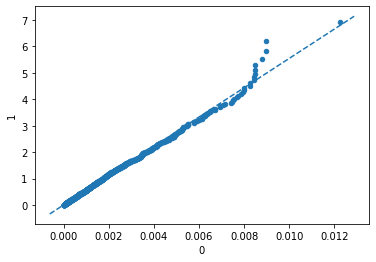

In [ ]:

ID_estimator(Dataset,plot=True)


##### 4.5. Estimation of limit ID of a fixed distribution

Assess the ID of a fixed distribution where the number of data points of the distribution goes to infinity

In [ ]:

d_estimator=[]

sizes=[20,50,100,200,500,1000,5000,10000]

for size in sizes:
   

   d_vec=array.array("f", (0 for k in range(5)))

   for j in range(5):
      Dataset1=[]
      for  i in range(size):

          data=numpy.random.uniform(random.randint(-10,-1),random.randint(1,10),20)
          Dataset1.append(data)

      print(size,j)

      Dataset1=pd.DataFrame(Dataset1)

      d=ID_estimator(Dataset1,plot=False)
      
      d_vec[j]=d

   d_estimator.append(stat.mean(d_vec))


d_estimator=pd.DataFrame(d_estimator)

sizes=pd.DataFrame(sizes)

to_plot=pd.concat([sizes,d_estimator],axis=1)


20 0
20 1
20 2
20 3
20 4
50 0
50 1
50 2
50 3
50 4
100 0
100 1
100 2
100 3
100 4
200 0
200 1
200 2
200 3
200 4
500 0
500 1
500 2
500 3
500 4
1000 0
1000 1
1000 2
1000 3
1000 4
5000 0
5000 1
5000 2
5000 3
5000 4
10000 0
10000 1
10000 2
10000 3
10000 4


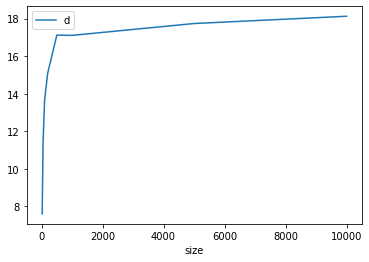

In [ ]:
to_plot.columns=['size','d']
to_plot.plot.line(x='size',y='d')

##### 4.6. Runtime analysis

In [ ]:
def plotruntime(f,r,function_of,trials=1,figsize=[3,3]):
    Times=[timeit.timeit(lambda:f(n),number=trials)/trials for n in r]
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(r,Times)
    ax.set_xlabel(function_of)
    ax.set_ylabel("Runtime")

###### 4.6.1. Implementation of specific functions to evaluate the runtime in function of the number of rows or columns

Rows (the number of columns is fixed)

In [ ]:
def ID_estimator_for_runtime_rows(N):
    
    dataset=Dataset[:N]

    # Distance matrix
    distance=pd.DataFrame(met.pairwise_distances(dataset)) 
   
    
    npoints=distance.shape[1]

    # dictionary to speed up the computation
    dic={}

    for i in range(npoints):
        dic[i]=find_the_two_NN(distance,i)

    
    
    # mu array
    mu_arr=compute_mu(dic)

    # New coordinates
    coord=fit_the_points(mu_arr)

    x=coord[0]
    y=coord[1]

    B=Linear_reg(x,y)
   

    return(B[0])



Columns ( the number of rows is fixed)

In [ ]:
def ID_estimator_for_runtime_columns(N):
    
    dataset=Dataset.iloc[:,:N]

    # Distance matrix
    distance=pd.DataFrame(met.pairwise_distances(dataset)) 
   
    
    npoints=distance.shape[1]

    # dictionary to speed up the computation
    dic={}

    for i in range(npoints):
        dic[i]=find_the_two_NN(distance,i)

    
    
    # mu array
    mu_arr=compute_mu(dic)

    # New coordinates
    coord=fit_the_points(mu_arr)

    x=coord[0]
    y=coord[1]

    B=Linear_reg(x,y)
   

    return(B[0])

###### 4.6.2. Plot of the runtime

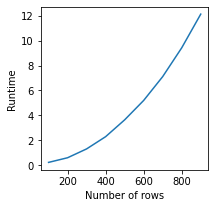

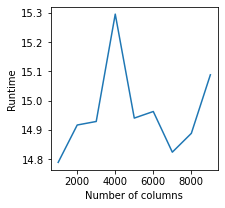

In [ ]:
plotruntime(ID_estimator_for_runtime_rows,range(100,1000,100),"Number of rows",3)
plotruntime(ID_estimator_for_runtime_columns,range(1000,10000,1000),"Number of columns",3)

###### 4.6.3. Runtime analysis of  the two-NN computation

Analysis of the part of the code that compute the two-nn for each data point.

* In function of the number of rows

In [ ]:
def Two_NN_normal_rows(N):
    dataset=Dataset[:N]

    distance=pd.DataFrame(met.pairwise_distances(dataset)) 

    npoints=distance.shape[1]

    # dictionary to speed up the computation
    dic={}

    for i in range(npoints):
        dic[i]=find_the_two_NN(distance,i)


    return(dic)

* In function of the number of columns

In [ ]:
def Two_NN_normal_columns(N):
    dataset=Dataset.iloc[:,:N]

    distance=pd.DataFrame(met.pairwise_distances(dataset)) 

    npoints=distance.shape[1]

    # dictionary to speed up the computation
    dic={}

    for i in range(npoints):
        dic[i]=find_the_two_NN(distance,i)


    return(dic)

* Plot of the runtime 

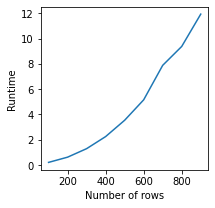

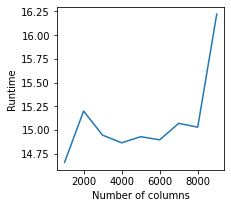

In [ ]:
plotruntime(Two_NN_normal_rows,range(100,1000,100),"Number of rows",2)
plotruntime(Two_NN_normal_columns,range(1000,10000,1000),"Number of columns",2)



##### 4.7. Storage analysis

###### 4.7.1. In function of the number of rows

The number of columns does not influence the storage used

In [ ]:
def Distance_spacestore_rows(N):
    dataset=Dataset[:N]

    distance=pd.DataFrame(met.pairwise_distances(dataset)) 

    return(sys.getsizeof(distance))

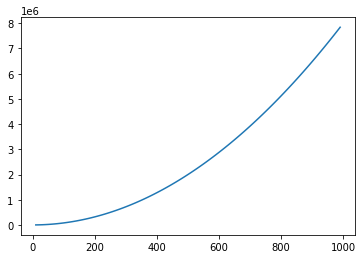

In [ ]:
size=[]

N=range(10,1000,10)

for i in N:
  size.append(Distance_spacestore_rows(i))

plt.plot(N,size)

##### 4.8. Implementation of a "fastest" version of the code

Does not compute the distance matrix, the method finds for each row, the two NN

In [ ]:
# work on numpy.array
def mu_vec_fast(arr):
   
   nrow=len(arr)

   ncol=len(arr[0])

   mu=array.array("f",(0 for i in range(nrow)))

  


   for i in range(nrow):

     Distance=numpy.sort( numpy.sqrt( numpy.sum( ( (arr-arr[i])**2),axis=1 ) ) ) 
     
     r1=Distance[Distance>0][0]

     r2=Distance[Distance>0][1]

     mu[i]=r2/r1

  
   return(mu)

 





In [ ]:
def ID_estimator_fast(dataset,plot=False):
  
    # Just because the created dataset is in DataFrame form
    dataset=dataset.to_numpy()
    
    mu_arr=mu_vec_fast(dataset)

    # New coordinates
    coord=fit_the_points(mu_arr)

    x=coord[0]
    y=coord[1]

    B=Linear_reg(x,y)
    
    if(plot):
      # plot
      coord.plot(x=0,y=1,kind="scatter")
    
      abline(B[0],0)
   

    return(B[0])


##### 4.9. Runtime analysis of the "fastest" version

In [ ]:

ID_estimator_fast(Dataset,plot=False)



array([554.50528596])

###### 4.9.1. Creation of specific functions to compute the runtime in function of the number of rows or columns

* Rows (Fixed number of columns)


In [ ]:
def ID_estimator_fast_for_runtime_rows(N):

    dataset=Dataset[:N]

    dataset=dataset.to_numpy()
    
    mu_arr=mu_vec_fast(dataset)

    # New coordinates
    coord=fit_the_points(mu_arr)

    x=coord[0]
    y=coord[1]

    B=Linear_reg(x,y)
    
  

    return(B[0])


* Columns (fixed number of rows)

In [ ]:
def ID_estimator_fast_for_runtime_columns(N):

    dataset=Dataset.iloc[:,:N]

    dataset=dataset.to_numpy()
    
    mu_arr=mu_vec_fast(dataset)

    # New coordinates
    coord=fit_the_points(mu_arr)

    x=coord[0]
    y=coord[1]

    B=Linear_reg(x,y)
    
    
   

    return(B[0])


###### 4.9.2. Time to execute the conversion DataFrame-Array

Costant runtime close to zero so does not influence the analysis

In [ ]:
def time_to_conversion(N):
   dataset=Dataset.iloc[:,:N]

   dataset=dataset.to_numpy()

   return(dataset)
   

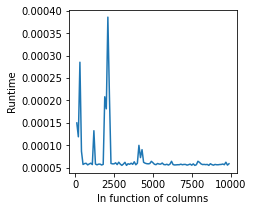

In [ ]:
plotruntime(time_to_conversion,range(100,10000,100),"In function of columns",10)


###### 4.9.3.  Plot the runtime

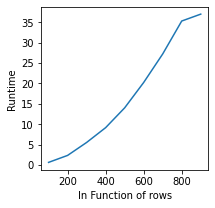

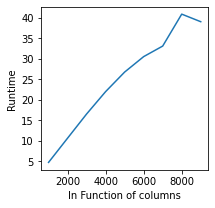

In [ ]:
plotruntime(ID_estimator_fast_for_runtime_rows,range(100,1000,100),"In Function of rows", 3)
plotruntime(ID_estimator_fast_for_runtime_columns,range(1000,10000,1000),"In Function of columns",3)

###### 4.9.4. Runtime analysis of the TWO-NN computation

In [ ]:
def Two_NN_fast_rows(N):
    
    dataset=Dataset[:N]

    # Just because the created dataset is in DataFrame form
    dataset=dataset.to_numpy()
    
    mu_arr=mu_vec_fast(dataset)

    return(mu_arr)

In [ ]:
def Two_NN_fast_columns(N):
    
    dataset=Dataset.iloc[: , :N]

    # Just because the created dataset is in DataFrame form
    dataset=dataset.to_numpy()
    
    mu_arr=mu_vec_fast(dataset)

    return(mu_arr)

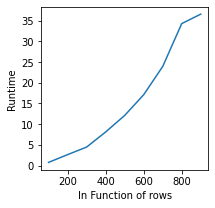

In [ ]:
plotruntime(Two_NN_fast_rows,range(100,1000,100),"In Function of rows", 2)


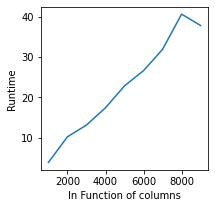

In [ ]:
plotruntime(Two_NN_fast_columns,range(1000,10000,1000),"In Function of columns", 2)


##### 4.10. Runtime comparison

In [ ]:
def plotruntimes(functions,labels,in_function_of,r,trials=1,figsize=[3,3]):
    fig, ax = plt.subplots(figsize=figsize)
    for f,l in zip(functions,labels):
        Times=[timeit.timeit(lambda:f(n),number=trials)/trials for n in r]
        ax.plot(r,Times,label=l)
    ax.set_xlabel(in_function_of)
    ax.set_ylabel("Runtime")
    ax.set_title("Runtime plot: "+str(trials)+" trial"+("s" if trials>1 else ""))
    ax.legend()


###### 4.10.1. ID_estimator vs ID_estimator_fast

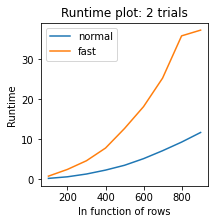

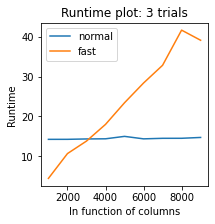

In [ ]:
plotruntimes([ID_estimator_for_runtime_rows,ID_estimator_fast_for_runtime_rows],["normal","fast"],"In function of rows",range(100,1000,100),2)
plotruntimes([ID_estimator_for_runtime_columns,ID_estimator_fast_for_runtime_columns],["normal","fast"],"In function of columns",range(1000,10000,1000),3)

###### TWO-NN estimator vs fast TWO-NN estimator

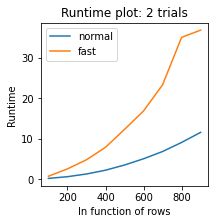

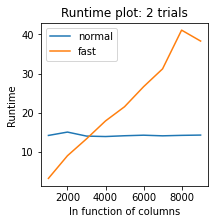

In [ ]:
plotruntimes([Two_NN_normal_rows, Two_NN_fast_rows],["normal","fast"],"In function of rows",range(100,1000,100),2)
plotruntimes([Two_NN_normal_columns,Two_NN_fast_columns],["normal","fast"],"In function of columns",range(1000,10000,1000),2)

### 5) Application to a text mining example

##### 5.1. Import of data and libraries 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:

import pickle
from pprint import pprint
import collections
import numpy as np
import matplotlib.pyplot as plt
import operator

# Natural Language Tool Kit (NLTK) imports
import nltk
from nltk.data  import load
from nltk.tokenize.treebank import TreebankWordTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

# Machine Learning Library (sklearn) imports
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

* Libraries installation

In [ ]:
# Install nltk, Library suited for text mining and texts processing
import nltk
nltk.download('punkt') # containing the tokeinzers
import nltk
nltk.download('stopwords')  # Frequent or meaningless words of,an,a...

# Split a text into sentences
sentence_splitter = load('tokenizers/punkt/english.pickle')

# Split a sentence into words
tokenizer = TreebankWordTokenizer()

# Reduce to word to the root
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##### 5.2. Creation of Puntuaction set and Stopwords_set

Being able to delete from texts the punctuation and very common english words

In [ ]:
punctuation = set([",", ".", ";", "/", ":", "-", "--" ,"!", "?", "(", ")","'",'"',"''", "``"])

# Set of common english words
stopwords_set = set(stopwords.words('english'))  # very common words in english
 

##### 5.3. Creation of a function to preprocess texts

* A. split the text in sentences

* B. split the sentences into tokens

* C. delete punctuation and common-words from the tokens

* D. reduce token-words to the root

In [ ]:
# Preprocess a given text
def preprocess_text(review):
    tokens = []
    # A. Split into sentences
    for sentence in sentence_splitter.tokenize(review):
        # B. Split into tokens
        for token in tokenizer.tokenize(sentence):
            token = token.lower()
            # C. Filter on stoplist and punctuation
            if token not in stopwords_set and token not in punctuation:
                # D. Stemming (takes root)
                stem = stemmer.stem(token)
                tokens.append(stem)
    return tokens


In [ ]:
ex=preprocess_text("This is how the algorithm works")

* Preprocessing example

In [ ]:
pprint( preprocess_text("""Suppose engineers at a semiconductor manufacturing facility want to test whether different wafer implant material dosages have a significant effect on resistivity measurements after a diffusion process taking place in a furnace. They have four different dosages they want to try and enough experimental wafers from the same lot to run three wafers at each of the dosages.

The nuisance factor they are concerned with is "furnace run" since it is known that each furnace run differs from the last and impacts many process parameters.
  
An ideal way to run this experiment would be to run all the 4x3=12 wafers in the same furnace run. That would eliminate the nuisance furnace factor completely. However, regular production wafers have furnace priority, and only a few experimental wafers are allowed into any furnace run at the same time.

.A non-blocked way to run this experiment would be to run each of the twelve experimental wafers, in random order, one per furnace run. That would increase the experimental error of each resistivity measurement by the run-to-run furnace variability and make it more difficult to study the effects of the different dosages. The blocked way to run this experiment, assuming you can convince manufacturing to let you put four experimental wafers in a furnace run, would be to put four wafers with different dosages in each of three furnace runs. The only randomization would be choosing which of the three wafers with dosage 1 would go into furnace run 1, and similarly for the wafers with dosages 2, 3 and 4."""))

['suppos',
 'engin',
 'semiconductor',
 'manufactur',
 'facil',
 'want',
 'test',
 'whether',
 'differ',
 'wafer',
 'implant',
 'materi',
 'dosag',
 'signific',
 'effect',
 'resist',
 'measur',
 'diffus',
 'process',
 'take',
 'place',
 'furnac',
 'four',
 'differ',
 'dosag',
 'want',
 'tri',
 'enough',
 'experiment',
 'wafer',
 'lot',
 'run',
 'three',
 'wafer',
 'dosag',
 'nuisanc',
 'factor',
 'concern',
 'furnac',
 'run',
 'sinc',
 'known',
 'furnac',
 'run',
 'differ',
 'last',
 'impact',
 'mani',
 'process',
 'paramet',
 'ideal',
 'way',
 'run',
 'experi',
 'would',
 'run',
 '4x3=12',
 'wafer',
 'furnac',
 'run',
 'would',
 'elimin',
 'nuisanc',
 'furnac',
 'factor',
 'complet',
 'howev',
 'regular',
 'product',
 'wafer',
 'furnac',
 'prioriti',
 'experiment',
 'wafer',
 'allow',
 'furnac',
 'run',
 'time',
 '.a',
 'non-block',
 'way',
 'run',
 'experi',
 'would',
 'run',
 'twelv',
 'experiment',
 'wafer',
 'random',
 'order',
 'one',
 'per',
 'furnac',
 'run',
 'would',
 'increa

##### 5.4. Importing and preprocessing the file

   * Creation of a dictionary that maps texts to their preprocessed tokens
   * Creation a set with all the possible tokens of the document (all the dimension of the dataset)

In [ ]:

with open('/content/gdrive/MyDrive/BIGDATA/data/sorted_data_acl/books/positive_text.review', 'r') as myfile: #positive reviwes about books
    pos_books = myfile.readlines()


# Dictionary of texts
B_pos={}

# All possible words
features=[]



for i in range(1000):
  # Preprocess the text
  pre=preprocess_text(pos_books[i].replace("'",' '))

  # Add the text to the dictionary
  B_pos[i]=pre

  # Add all the tokens to the list
  for j in pre:
    features.append(j)
    

# list to set 
features=set(features)


# set to dictionary
feat={}

k=0
# Each word in features is associated to an integer (index of columns)
for i in features:
   feat[i]=k
   k+=1



  

* Number of different tokens ( length of the set) = number of dataset dimension

In [ ]:
# Number of dimensions
len(feat)

11529

##### 5.5. Creation of the dataset

###### 5.5.1. Implementation of a specific function to compute the TF-IDF value of each token given a sentence

[For more information about the TF-IDF value](https://monkeylearn.com/blog/what-is-tf-idf/#:~:text=TF%2DIDF%20(term%20frequency%2D,across%20a%20set%20of%20documents.)

In [ ]:
# Function that given the dict of all features and the dict of the tfifd of a text, return an array (representation of the text in features dimensions)
def assign_tfidf(features,tfidf):
  length=len(features)

 # Initialize a 0 array of length = length
  arr=array.array("f", (0 for i in range(length)))
  
 # All the possible dimensions 
  rigthnames=features.keys()

 # For each element in the tfidf dict 
  for el in tfidf:
     names=tfidf.keys()
     
     for name in names:
         # It should be always true but just to be sure
         if(name in rigthnames):

           # index= integer associated to the name in features dict
           index=features[name]

           # Tfidf associated to the name in tfidf dict
           value=tfidf[name]

           # update the value of arr
           arr[index]=value
       
  return(arr)



###### 5.5.2. Installation of useful documents to compute the TF-IDF

In [ ]:
# A document containing thousands of documents to evaluate the inverse document frequency of english words
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
from nltk.corpus import brown
# Group of English sentences
brown_corpus = brown.sents()


In [ ]:
preprocessed_sentences = []

# create a list of preprocessed sentences from brown
for sentence in brown_corpus:
    clean_sentence = preprocess_text(' '.join(sentence))
    preprocessed_sentences.append(" ".join(clean_sentence))

In [ ]:
preprocessed_sentences

["fulton counti grand juri said friday investig atlanta 's recent primari elect produc evid irregular took place",
 'juri said term-end present citi execut committe over-al charg elect deserv prais thank citi atlanta manner elect conduct',
 'september-octob term juri charg fulton superior court judg durwood pye investig report possibl irregular hard-fought primari mayor-nomin ivan allen jr.',
 'rel hand report receiv juri said consid widespread interest elect number voter size citi',
 "juri said find mani georgia 's registr elect law outmod inadequ often ambigu",
 'recommend fulton legisl act law studi revis end modern improv',
 'grand juri comment number topic among atlanta fulton counti purchas depart said well oper follow gener accept practic inur best interest govern',
 'merger propos',
 'howev juri said believ two offic combin achiev greater effici reduc cost administr',
 'citi purchas depart juri said lack experienc cleric personnel result citi personnel polici',
 'urg citi take 

In [ ]:
# Vectorizer based on "english" document words
vectorizer = TfidfVectorizer(stop_words='english')
tf_idf = vectorizer.fit(preprocessed_sentences)
idf = vectorizer.idf_

# dictionary word->tfidf
idf = dict(zip(vectorizer.get_feature_names(), idf))

# sort the dict based on the tfidf value
sorted_idf = sorted(idf.items(), key=operator.itemgetter(1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


###### 5.5.3. Creation of the Dataset

In [ ]:
import warnings
warnings.filterwarnings("ignore") # .get_feature_name "deprecated"
dataset=[]

for i in range(1000):
  
  # Book review document 
  book_doc = " ".join(B_pos[i])
  # Compute TF-IDF
  result = vectorizer.transform([book_doc])

  feature_names = tf_idf.get_feature_names()

  # tfidf as a dict  word - tfidf value
  tfidf = {}
  for col in result.nonzero()[1]:
      tfidf[feature_names[col]]=result[0, col]

  dataset.append(assign_tfidf(feat,tfidf))
  

  



In [ ]:
# for a single document
book_doc = " ".join(ex)
# Compute TF-IDF
result = vectorizer.transform([book_doc])
feature_names = tf_idf.get_feature_names()
tfidf = []
for col in result.nonzero()[1]:
    tfidf.append((feature_names[col],result[0, col]))
sorted_tfidf = sorted(tfidf, key=lambda x: x[1])
sorted_tfidf.reverse()
pprint(sorted_tfidf)

[('algorithm', 0.9167635831535623), ('work', 0.39943025999971693)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Example of TF-IDF for a single document

In [ ]:
# for a single document
book_doc = " ".join(B_pos[1])
# Compute TF-IDF
result = vectorizer.transform([book_doc])
feature_names = tf_idf.get_feature_names()
tfidf = []
for col in result.nonzero()[1]:
    tfidf.append((feature_names[col],result[0, col]))
sorted_tfidf = sorted(tfidf, key=lambda x: x[1])
sorted_tfidf.reverse()
pprint(sorted_tfidf[0:15])

[('medicin', 0.6190289211415073),
 ('complementari', 0.32997558571816893),
 ('book', 0.2651735529162098),
 ('oz', 0.21610757775969017),
 ('dr', 0.213639340819317),
 ('bit', 0.15332329297122058),
 ('combin', 0.14810396702047465),
 ('western', 0.14753319599330655),
 ('contain', 0.14082698150432307),
 ('read', 0.13059219499404318),
 ('cardiac', 0.11973200664176385),
 ('epilogu', 0.11973200664176385),
 ('hypnosi', 0.11973200664176385),
 ('yoga', 0.11973200664176385),
 ('millennium', 0.10999186190605631)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
dataset=pd.DataFrame(dataset)

In [ ]:
dataset.columns=features
dataset

,proverbi,candi,abliti,milk,edit,book,uncompl,ferrer,intro,kid,...,dad,why-did-the-illustrator-make-that-choic,pavilion,open-mind,doctrin,intimid,self-absorb,misunderstood,collid,brule
0,0.0,0.0,0.0,0.0,0.0,0.072099,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.265174,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.282634,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.132491,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.213154,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.457021,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.147632,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.060985,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### 5.6. Application of TWO-NN ID estimator to the dataset

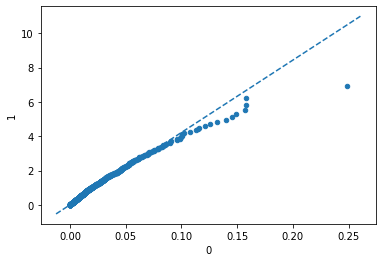

In [ ]:
coord=ID_estimator(dataset,plot=True)

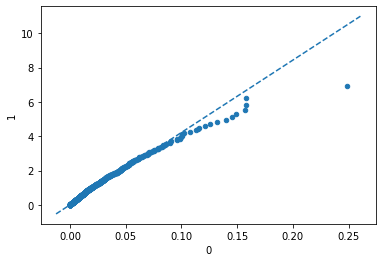

In [ ]:
coord1=ID_estimator_fast(dataset,plot=True)

##### 5.7.  Sort of feature selection to select the best features

We selected the features with higher TF-IDF mean

In [ ]:
# Sort of feature selection to select the best dimensions
mean_for_feature=dataset.apply(stat.mean,0)

In [ ]:
numpy.mean(dataset["book"])

0.21044060796592384

In [ ]:
# Indexes of the "best" features
sort_index=numpy.argsort(-mean_for_feature)

In [ ]:
# Selecting the first 42 "best" features
df_new=dataset.iloc[:,list(sort_index[:42])]

In [ ]:
df_new

,book,read,stori,like,love,great,charact,recommend,time,good,...,thing,understand,look,highli,easi,inform,review,feel,live,histori
0,0.072099,0.071014,0.075514,0.000000,0.000000,0.000000,0.000000,0.082228,0.000000,0.0,...,0.125524,0.000000,0.0,0.000000,0.000000,0.070086,0.00000,0.0,0.064728,0.000000
1,0.265174,0.130592,0.069433,0.000000,0.000000,0.058104,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
2,0.282634,0.139191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
3,0.132491,0.000000,0.000000,0.098807,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
4,0.213154,0.069982,0.223249,0.052987,0.000000,0.062274,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.08483,0.0,0.000000,0.215233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.457021,0.225073,0.000000,0.000000,0.446518,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
996,0.147632,0.000000,0.154624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.128513,0.149657,0.0,0.000000,0.000000,0.143511,0.00000,0.0,0.132540,0.000000
997,0.060985,0.060067,0.000000,0.090960,0.059583,0.053451,0.067924,0.000000,0.086641,0.0,...,0.053087,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095638,0.238270,0.0,...,0.072997,0.085007,0.0,0.000000,0.191918,0.000000,0.10012,0.0,0.000000,0.000000


In [ ]:
list(df_new.columns)

['book',
 'read',
 'stori',
 'like',
 'love',
 'great',
 'charact',
 'recommend',
 'time',
 'good',
 'work',
 'author',
 'realli',
 'life',
 'mani',
 'make',
 'novel',
 'enjoy',
 'reader',
 'way',
 'best',
 'use',
 'peopl',
 'written',
 'want',
 'write',
 'world',
 'page',
 'know',
 'think',
 'year',
 'help',
 'thing',
 'understand',
 'look',
 'highli',
 'easi',
 'inform',
 'review',
 'feel',
 'live',
 'histori']

### 6) EVALUATION AND ASSESSMENT OF THE ID ESTIMATE** ### 

##### 6.1. Recall


The paper has as one of it based references the paper: **<a href="https://papers.nips.cc/paper/2004/file/74934548253bcab8490ebd74afed7031-Paper.pdf">Levina, E. & Bickel, P. J. Maximum likelihood estimation of intrinsic dimension. In Advances in neural information processing systems
777–784 (2004).</a>** 


For the estimation of the intrinsic dimension, we have generally two type of methods:
* the projection method type: 
  * Based on the Eigenvalue methods
  * Example: PCA,  
* the geometric method type: 
  * it is based on the nearest neighboor (NN) distance or fractal dimensions
  * Example: NN, MLE

For this section, we will be using mainly two sklearn packages to compare the accuracy of the true ID estimation for a set of given manifold dataset with our own 2NN alogrithm.

Those packages are:
  * **random projection package**: for this one, we will be using:
    * GaussianRandomProjection method to estimate the **Intrinsic Dimension (ID)**
    * Johnson Lidenstrauss projection method

  * **scikit-dimension package**: from this package,
    * we will generate some dataset with known **ID**
    * use the ID estimation function to calculate the **ID** 

  It should be noted that the manifold dataset will be taken from the scikit-dimension package where we can fine many kind of dataset with their true intrinsic dimension value. *See the section 6.2. below to view the table.*
  

Some useful links to better understand the different packages that are going to be used:
* https://github.com/scikit-learn-contrib/scikit-dimension
* https://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html
* https://scikit-learn.org/stable/modules/random_projection.html#random-projection
* https://scikit-dimension.readthedocs.io/en/latest/skdim.datasets.BenchmarkManifolds.html
* https://towardsdatascience.com/manifolds-in-data-science-a-brief-overview-2e9dde9437e5
* https://www.britannica.com/science/manifold
* https://medium.com/data-science-in-your-pocket/random-projection-for-dimension-reduction-27d2ec7d40cd
* https://scikit-dimension.readthedocs.io/en/stable/skdim.id.MLE.html

##### 6.2. Show the table of the different dataset with the default ID 

The table below will show the list of the different manifolds(curve surfaces) dataset available in the **BenchmarkManifolds dataset list**

------
***From here on, run every cell to avoid some error***

----

In [ ]:
benchmark = skdim.datasets.BenchmarkManifolds(random_state=0)
#dictionary with all datasets
dict_data = benchmark.generate()
#ground truth dataframe
truth = benchmark.truth
truth = truth.rename_axis('dataset_type').reset_index(level=0)
print('Shape of our truth table ', truth.shape)
truth.head(24)

Shape of our truth table  (24, 4)


,dataset_type,Intrinsic Dimension,Number of variables,Description
0,M1_Sphere,10,11,10D sphere linearly embedded
1,M2_Affine_3to5,3,5,Affine space
2,M3_Nonlinear_4to6,4,6,"Concentrated figure, mistakable with a 3D one"
3,M4_Nonlinear,4,8,Nonlinear manifold
4,M5a_Helix1d,1,3,1D helix
5,M5b_Helix2d,2,3,2D helix
6,M6_Nonlinear,6,36,Nonlinear manifold
7,M7_Roll,2,3,Swiss Roll
8,M8_Nonlinear,12,72,Nonlinear (highly curved) manifold
9,M9_Affine,20,20,Affine space


##### 6.3. Generate the different dataset with some noise columns

The function below return all the dataset present in the skdim manifolds dataset with default **ID**.

*It should be noted that there are some dataset having restrictions and that make difficult the customization of those given manifolds*

In [ ]:
def generate_manifolds_list(dataframe_truth ):
  list_dataset = []
  benchmark = skdim.datasets.BenchmarkManifolds(random_state=0)
  ###
  dict_data = benchmark.generate()
  ##
  for index, row in dataframe_truth.iterrows():
    dataset_type =	row['dataset_type']
    #generate a dataset with custom parameters
    manifold_custom = dict_data[dataset_type]

    list_dataset.append(manifold_custom)
  return list_dataset

----

The function below generate a set of manifolds dataset with their default intrinsic value for the set of manifolds where it is possible to modify the default number of columns. 

It should be noted that the number of column does not impact on the intrinsic dimension of the set

In [ ]:

def generate_custom_manifolds_list(dataframe_truth, nrows= 2500, ncols = 1000 ):
  list_dataset = []
  benchmark = skdim.datasets.BenchmarkManifolds(random_state=0)
  ### Set of manifold that do not have any constraint on parameter customisation
  dataset_label = [
    "M1_Sphere", 
    #"M4_Nonlinear",
    #"M6_Nonlinear",
    #"M8_Nonlinear",
    "M9_Affine", 
    "M10a_Cubic",
    "M10b_Cubic",
    "M10c_Cubic",
    "M10d_Cubic",
    "M12_Norm",
    #"Mbeta",
    #"Mn1_Nonlinear",
    #"Mn2_Nonlinear",
    #"Mp1_Paraboloid",
    #"Mp2_Paraboloid",
    #"Mp3_Paraboloid"
  ]
  ##
  for index, row in dataframe_truth.iterrows():
    dataset_type =	row['dataset_type']
    id_default = row['Intrinsic Dimension']
    #print(id_default, type(id_default))
    if dataset_type in dataset_label: 
      #generate a dataset with custom parameters
      manifold_custom = benchmark.generate(name=dataset_type,n=nrows,dim=ncols,d=id_default) #np.array (nrows x ncols)
      #print(manifold_custom)
      list_dataset.append(manifold_custom)
  return list_dataset



##### 6.4. Calculate the ID from the PCA algorithm of the package skim


In [ ]:
def square_distance_error(x, y):
  return pow( (x-y), 2)

In [ ]:
def id_estimate_pca_skdim(dataframe_truth, list_manifold, neighbors_val = 25):
  pca=skdim.id.lPCA()
  list_dim = []
  list_elapsed_time = []
  for manifold in list_manifold:
    #start time
    start = timer() #timeit.timeit()
    #
    dim_arr =pca.fit_pw(manifold,n_neighbors=neighbors_val).dimension_pw_
    dim_val = np.mean(dim_arr)
    #end time
    end = timer()#timeit.timeit()
    #
    list_dim.append(dim_val)
    list_elapsed_time.append(end - start)
  
  df_new = dataframe_truth [['dataset_type',	'Intrinsic Dimension']]
  df_new['pca_id'] = list_dim
  df_new['pca_time'] = list_elapsed_time
  df_new['pca_error'] = df_new.apply(lambda x: square_distance_error(x['Intrinsic Dimension'], x['pca_id']), axis=1)

  return df_new


  

###### 6.4.1 For all the default dataset

In [ ]:
data = truth#.iloc[0:5]
list_manifold = generate_manifolds_list(data)
skdim_pca_default = id_estimate_pca_skdim(data, list_manifold)
skdim_pca_default.head(24)

,dataset_type,Intrinsic Dimension,pca_id,pca_time,pca_error
0,M1_Sphere,10,9.9604,1.399929,1.568160e-03
1,M2_Affine_3to5,3,3.0000,0.796257,0.000000e+00
2,M3_Nonlinear_4to6,4,4.6932,0.987354,4.805262e-01
3,M4_Nonlinear,4,5.1956,0.962334,1.429459e+00
4,M5a_Helix1d,1,1.0000,0.764111,0.000000e+00
5,M5b_Helix2d,2,2.9464,0.746168,8.956730e-01
6,M6_Nonlinear,6,8.9308,1.790953,8.589589e+00
7,M7_Roll,2,2.0000,0.730086,0.000000e+00
8,M8_Nonlinear,12,15.8224,2.081505,1.461074e+01
9,M9_Affine,20,15.8604,1.697167,1.713629e+01


###### 6.4.2 For the customizable manifolds

In [ ]:
dataset_label = [
    "M1_Sphere", 
    "M9_Affine", 
    "M10a_Cubic",
    "M10b_Cubic",
    "M10c_Cubic",
    "M10d_Cubic",
    "M12_Norm"
]
data = truth[truth['dataset_type'].isin(dataset_label)]
list_manifold = generate_custom_manifolds_list(data, nrows= 2500, ncols = 1000 )
skdim_pca_custom = id_estimate_pca_skdim(data, list_manifold)
skdim_pca_custom.head(24)

,dataset_type,Intrinsic Dimension,pca_id,pca_time,pca_error
0,M1_Sphere,10,9.9604,4.191926,0.001568
9,M9_Affine,20,15.8400,4.778627,17.305600
10,M10a_Cubic,10,10.4852,4.182590,0.235419
11,M10b_Cubic,17,14.8896,4.672896,4.453788
12,M10c_Cubic,24,17.8688,5.053103,37.591613
13,M10d_Cubic,70,23.9996,5.566617,2116.036800
15,M12_Norm,20,15.9576,4.712553,16.340998


##### 6.5. Calculate the ID from the MLE algorithm of the package skim


In [ ]:
def id_estimate_mle_skdim(dataframe_truth, list_manifold, neighbors_val = 25):
  mle=skdim.id.MLE()
  list_dim = []
  list_elapsed_time = []
  for manifold in list_manifold:
    #start time
    start = timer() #timeit.timeit()
    #
    dim_val =mle.fit_predict(manifold,n_neighbors=neighbors_val)#.dimension_pw_
    #dim_val = np.mean(dim_arr)
    #end time
    end = timer()#timeit.timeit()
    #
    list_dim.append(dim_val)
    list_elapsed_time.append(end - start)
  
  df_new = dataframe_truth [['dataset_type',	'Intrinsic Dimension']]
  df_new['mle_id'] = list_dim
  df_new['mle_time'] = list_elapsed_time
  df_new['mle_error'] = df_new.apply(lambda x: square_distance_error(x['Intrinsic Dimension'], x['mle_id']), axis=1)

  return df_new

###### 6.5.1 For all the default dataset

In [ ]:
data = truth#.iloc[0:5]
list_manifold = generate_manifolds_list(data)
skdim_mle_default = id_estimate_mle_skdim(data, list_manifold)
skdim_mle_default.head(24)

,dataset_type,Intrinsic Dimension,mle_id,mle_time,mle_error
0,M1_Sphere,10,8.947787,0.222454,1.107152
1,M2_Affine_3to5,3,2.855454,0.062450,0.020894
2,M3_Nonlinear_4to6,4,3.737550,0.075992,0.068880
3,M4_Nonlinear,4,3.935440,0.122072,0.004168
4,M5a_Helix1d,1,1.005041,0.050537,0.000025
5,M5b_Helix2d,2,2.605764,0.058056,0.366950
6,M6_Nonlinear,6,6.452278,0.232019,0.204555
7,M7_Roll,2,1.953771,0.054061,0.002137
8,M8_Nonlinear,12,13.318545,0.274887,1.738562
9,M9_Affine,20,14.276002,0.235943,32.764158


###### 6.5.2 For the customizable manifolds

In [ ]:
dataset_label = [
    "M1_Sphere", 
    "M9_Affine", 
    "M10a_Cubic",
    "M10b_Cubic",
    "M10c_Cubic",
    "M10d_Cubic",
    "M12_Norm"
]
data = truth[truth['dataset_type'].isin(dataset_label)]
list_manifold = generate_custom_manifolds_list(data, nrows= 2500, ncols = 1000 )
skdim_mle_custom = id_estimate_mle_skdim(data, list_manifold)
skdim_mle_custom.head(24)

,dataset_type,Intrinsic Dimension,mle_id,mle_time,mle_error
0,M1_Sphere,10,8.947787,0.415995,1.107152
9,M9_Affine,20,14.340399,0.414115,32.031084
10,M10a_Cubic,10,8.572587,0.418045,2.037507
11,M10b_Cubic,17,13.170869,0.450214,14.662248
12,M10c_Cubic,24,17.033782,0.427975,48.528199
13,M10d_Cubic,70,35.293946,0.406679,1204.510160
15,M12_Norm,20,15.329400,0.408555,21.814503


##### 6.6. Calculate the ID from the Gaussian Random projection


For This gaussian random projection, the dataset to be considered are the manifold datasets that can be customized.

In [ ]:
def id_estimate_gaussian_projection(dataframe_truth, list_manifold ):
  list_dim = []
  list_elapsed_time = []
  rng = numpy.random.RandomState(0)

  for manifold in list_manifold:
    #start time
    start = timer() #timeit.timeit()
    #
    transformer = GaussianRandomProjection(eps=0.9999, random_state=rng)
    X_new = transformer.fit_transform(manifold)
    #end time
    end = timer()#timeit.timeit()
    #
    list_dim.append(X_new.shape[1])
    list_elapsed_time.append(end - start)
  
  df_new = dataframe_truth [['dataset_type',	'Intrinsic Dimension']]
  df_new['gaussian_id'] = list_dim
  df_new['gaussian_time'] = list_elapsed_time
  df_new['gaussian_error'] = df_new.apply(lambda x: square_distance_error(x['Intrinsic Dimension'], x['gaussian_id']), axis=1)

  return df_new


  

###### 6.6.1. For the customisable data *only*

In [ ]:
dataset_label = [
    "M1_Sphere", 
    "M9_Affine", 
    "M10a_Cubic",
    "M10b_Cubic",
    "M10c_Cubic",
    "M10d_Cubic",
    "M12_Norm"
]
data = truth[truth['dataset_type'].isin(dataset_label)]
list_manifold = generate_custom_manifolds_list(data, nrows= 2500, ncols = 1000 )
gaussian_custom = id_estimate_gaussian_projection(data, list_manifold)
gaussian_custom.head(24)



,dataset_type,Intrinsic Dimension,gaussian_id,gaussian_time,gaussian_error
0,M1_Sphere,10,187,0.051693,31329
9,M9_Affine,20,187,0.057567,27889
10,M10a_Cubic,10,187,0.046937,31329
11,M10b_Cubic,17,187,0.064424,28900
12,M10c_Cubic,24,187,0.049466,26569
13,M10d_Cubic,70,187,0.050959,13689
15,M12_Norm,20,187,0.049761,27889


##### 6.7. Calculate the ID from the Johnson Lidenstrauss projection method

This method does not care about the relationship between the data, it works only with the number of data and find the approximative ID for that given number of features with a given error

In [ ]:
def id_estimate_jl_projection(dataframe_truth, list_manifold ):
  list_dim = []
  list_elapsed_time = []
  rng = numpy.random.RandomState(0)

  for manifold in list_manifold:
    #start time
    start = timer() #timeit.timeit()
    #
    #end time
    end = timer()#timeit.timeit()
    #
    list_dim.append(johnson_lindenstrauss_min_dim(manifold.shape[1], eps=0.9999))
    list_elapsed_time.append(end - start)
  
  df_new = dataframe_truth [['dataset_type',	'Intrinsic Dimension']]
  df_new['jl_id'] = list_dim
  df_new['jl_time'] = list_elapsed_time
  df_new['jl_error'] = df_new.apply(lambda x: square_distance_error(x['Intrinsic Dimension'], x['jl_id']), axis=1)

  return df_new

###### 6.7.1. For all the dataset

In [ ]:
data = truth#.iloc[0:5]
list_manifold = generate_manifolds_list(data)
jl_default = id_estimate_jl_projection(data, list_manifold)
jl_default.head(26)

,dataset_type,Intrinsic Dimension,jl_id,jl_time,jl_error
0,M1_Sphere,10,57,3.900022e-07,2209
1,M2_Affine_3to5,3,38,7.249982e-07,1225
2,M3_Nonlinear_4to6,4,43,2.339984e-07,1521
3,M4_Nonlinear,4,49,2.000015e-07,2025
4,M5a_Helix1d,1,26,2.419984e-07,625
5,M5b_Helix2d,2,26,2.380002e-07,576
6,M6_Nonlinear,6,86,2.060005e-07,6400
7,M7_Roll,2,26,4.760004e-07,576
8,M8_Nonlinear,12,102,2.570014e-07,8100
9,M9_Affine,20,71,5.220027e-07,2601


###### 6.7.2. For the customisable dataset

In [ ]:
dataset_label = [
    "M1_Sphere", 
    "M9_Affine", 
    "M10a_Cubic",
    "M10b_Cubic",
    "M10c_Cubic",
    "M10d_Cubic",
    "M12_Norm"
]
data = truth[truth['dataset_type'].isin(dataset_label)]
list_manifold = generate_custom_manifolds_list(data, nrows= 2500, ncols = 1000 )
jl_custom = id_estimate_jl_projection(data, list_manifold)
jl_custom.head(24)


,dataset_type,Intrinsic Dimension,jl_id,jl_time,jl_error
0,M1_Sphere,10,165,8.290008e-07,24025
9,M9_Affine,20,165,4.540016e-07,21025
10,M10a_Cubic,10,165,3.440000e-07,24025
11,M10b_Cubic,17,165,2.809975e-07,21904
12,M10c_Cubic,24,165,2.909983e-07,19881
13,M10d_Cubic,70,165,1.640001e-07,9025
15,M12_Norm,20,165,5.230031e-07,21025


##### **6.8. Calculate the ID from our algorithm : the 2NN ID estimate**

In [ ]:
def id_estimate_2NN_algo(dataframe_truth, list_manifold):
  
  list_dim = []
  list_elapsed_time = []
  for manifold in list_manifold:
    dataset = pd.DataFrame(manifold)
    #start time
    start = timer() #timeit.timeit()
    #
    dim_val = ID_estimator(dataset,plot=False)[0]
    #end time
    end = timer()#timeit.timeit()
    #
    list_dim.append(dim_val)
    list_elapsed_time.append(end - start)
  
  df_new = dataframe_truth [['dataset_type',	'Intrinsic Dimension']]
  df_new['2nn_id'] = list_dim
  df_new['2nn_time'] = list_elapsed_time
  df_new['2nn_error'] = df_new.apply(lambda x: square_distance_error(x['Intrinsic Dimension'], x['2nn_id']), axis=1)

  return df_new


  

###### 6.8.1. For all the dataset

In [ ]:
data = truth#.iloc[0:5] #34m5s
list_manifold = generate_manifolds_list(data)
df_2nn = id_estimate_2NN_algo(data, list_manifold)
df_2nn.head(24)

,dataset_type,Intrinsic Dimension,2nn_id,2nn_time,2nn_error
0,M1_Sphere,10,9.405339,89.192294,0.353621
1,M2_Affine_3to5,3,2.959170,92.976195,0.001667
2,M3_Nonlinear_4to6,4,3.791889,90.681407,0.043310
3,M4_Nonlinear,4,3.689355,91.385412,0.096500
4,M5a_Helix1d,1,1.009278,94.326099,0.000086
5,M5b_Helix2d,2,1.982765,91.592305,0.000297
6,M6_Nonlinear,6,5.719325,101.375288,0.078779
7,M7_Roll,2,1.952463,94.264608,0.002260
8,M8_Nonlinear,12,13.472597,91.469126,2.168543
9,M9_Affine,20,14.836958,91.899082,26.657007


###### 6.8.2. For the customizable dataset

In [ ]:
dataset_label = [
    "M1_Sphere", 
    "M9_Affine", 
    "M10a_Cubic",
    "M10b_Cubic",
    "M10c_Cubic",
    "M10d_Cubic",
    "M12_Norm"
]
data = truth[truth['dataset_type'].isin(dataset_label)]
list_manifold = generate_custom_manifolds_list(data, nrows= 2500, ncols = 1000 )
res_2nn_custom = id_estimate_2NN_algo(data, list_manifold)
res_2nn_custom.head(24)


,dataset_type,Intrinsic Dimension,2nn_id,2nn_time,2nn_error
0,M1_Sphere,10,9.405339,94.676869,0.353621
9,M9_Affine,20,15.567311,91.356253,19.648731
10,M10a_Cubic,10,9.030785,92.633768,0.939378
11,M10b_Cubic,17,14.324860,93.598914,7.156371
12,M10c_Cubic,24,18.545136,91.223688,29.755536
13,M10d_Cubic,70,41.598933,91.782127,806.620602
15,M12_Norm,20,17.101066,99.618753,8.403821


##### 6.9. Square distance Error evaluation

In [ ]:
def  best_id_function(x):
  pca = x['pca_error']
  er_2knn = x['2nn_error']
  if pca < er_2knn:
    return 'skdim_pca'
  else:
    return '2nn'

In [ ]:
def  best_id_function3(x):
  pca = x['pca_error']
  er_2knn = x['2nn_error']
  gaussian = x['gaussian_error']
  if (pca < er_2knn) and (pca < gaussian):
    return 'skdim_pca'
  elif (er_2knn < pca) and (er_2knn < gaussian):
    return '2nn'
  else:
    return 'gaussian_proj'

###### 6.9.1 For all the dataset

In [ ]:

new_df = pd.merge(skdim_pca_default, skdim_mle_default[['dataset_type', 'mle_id', 'mle_time', 'mle_error' ]], on="dataset_type")
new_df = pd.merge(new_df, df_2nn[['dataset_type', '2nn_id', '2nn_time', '2nn_error' ]], on="dataset_type")
new_df = pd.merge(new_df, jl_default[['dataset_type', 'jl_id', 'jl_time', 'jl_error' ]], on="dataset_type")

new_df['best_id'] = new_df.apply(lambda x: best_id_function(x), axis=1)

new_df.head(5)


,dataset_type,Intrinsic Dimension,pca_id,pca_time,pca_error,mle_id,mle_time,mle_error,2nn_id,2nn_time,2nn_error,jl_id,jl_time,jl_error,best_id
0,M1_Sphere,10,9.9604,1.399929,0.001568,8.947787,0.222454,1.107152,9.405339,89.192294,0.353621,57,3.900022e-07,2209,skdim_pca
1,M2_Affine_3to5,3,3.0000,0.796257,0.000000,2.855454,0.062450,0.020894,2.959170,92.976195,0.001667,38,7.249982e-07,1225,skdim_pca
2,M3_Nonlinear_4to6,4,4.6932,0.987354,0.480526,3.737550,0.075992,0.068880,3.791889,90.681407,0.043310,43,2.339984e-07,1521,2nn
3,M4_Nonlinear,4,5.1956,0.962334,1.429459,3.935440,0.122072,0.004168,3.689355,91.385412,0.096500,49,2.000015e-07,2025,2nn
4,M5a_Helix1d,1,1.0000,0.764111,0.000000,1.005041,0.050537,0.000025,1.009278,94.326099,0.000086,26,2.419984e-07,625,skdim_pca


In [ ]:
print('total value = ',new_df['best_id'].size)
new_df['best_id'].value_counts()

total value =  24


skdim_pca    13
2nn          11
Name: best_id, dtype: int64

In [ ]:
print('% of each method')
new_df['best_id'].value_counts()/new_df['best_id'].size * 100

% of each method


skdim_pca    54.166667
2nn          45.833333
Name: best_id, dtype: float64

----
* **Comments**: The pca method from the skdim package has the highest efficienct overall, but our 2NN algorithm also has a good prediction error and also perform well in identifying the real ID of a dataset.

###### 6.9.2 For the customisable dataset

In [ ]:
new_df1 = pd.merge(skdim_pca_custom, skdim_mle_custom[['dataset_type', 'mle_id', 'mle_time', 'mle_error' ]], on="dataset_type")
new_df1 = pd.merge(new_df1, res_2nn_custom[['dataset_type', '2nn_id', '2nn_time', '2nn_error' ]], on="dataset_type")
new_df1 = pd.merge(new_df1, jl_custom[['dataset_type', 'jl_id', 'jl_time', 'jl_error' ]], on="dataset_type")

new_df1 = pd.merge(new_df1, gaussian_custom[['dataset_type', 'gaussian_id', 'gaussian_time', 'gaussian_error' ]], on="dataset_type")

new_df1['best_id'] = new_df1.apply(lambda x: best_id_function3(x), axis=1)
new_df1.head(10)

,dataset_type,Intrinsic Dimension,pca_id,pca_time,pca_error,mle_id,mle_time,mle_error,2nn_id,2nn_time,2nn_error,jl_id,jl_time,jl_error,gaussian_id,gaussian_time,gaussian_error,best_id
0,M1_Sphere,10,9.9604,4.191926,0.001568,8.947787,0.415995,1.107152,9.405339,94.676869,0.353621,165,8.290008e-07,24025,187,0.051693,31329,skdim_pca
1,M9_Affine,20,15.8400,4.778627,17.305600,14.340399,0.414115,32.031084,15.567311,91.356253,19.648731,165,4.540016e-07,21025,187,0.057567,27889,skdim_pca
2,M10a_Cubic,10,10.4852,4.182590,0.235419,8.572587,0.418045,2.037507,9.030785,92.633768,0.939378,165,3.440000e-07,24025,187,0.046937,31329,skdim_pca
3,M10b_Cubic,17,14.8896,4.672896,4.453788,13.170869,0.450214,14.662248,14.324860,93.598914,7.156371,165,2.809975e-07,21904,187,0.064424,28900,skdim_pca
4,M10c_Cubic,24,17.8688,5.053103,37.591613,17.033782,0.427975,48.528199,18.545136,91.223688,29.755536,165,2.909983e-07,19881,187,0.049466,26569,2nn
5,M10d_Cubic,70,23.9996,5.566617,2116.036800,35.293946,0.406679,1204.510160,41.598933,91.782127,806.620602,165,1.640001e-07,9025,187,0.050959,13689,2nn
6,M12_Norm,20,15.9576,4.712553,16.340998,15.329400,0.408555,21.814503,17.101066,99.618753,8.403821,165,5.230031e-07,21025,187,0.049761,27889,2nn


In [ ]:
new_df1['best_id'].value_counts()

skdim_pca    4
2nn          3
Name: best_id, dtype: int64

In [ ]:
print('% of each method')
new_df1['best_id'].value_counts()/new_df1['best_id'].size * 100

% of each method


skdim_pca    57.142857
2nn          42.857143
Name: best_id, dtype: float64

----
* **Comments**: As with the previous case, the best algorithm are the pca and our 2NN algorithms which greatly find the true ID of a given manifold with some good error rate.

##### 6.10. Study the evolution of the error regarding to the number of rows and columns of the data

In [ ]:
def build_id_eval_features_rows_change(truth_table, nrows= 2500, ncols = 1000):
  dataset_label = [
    "M1_Sphere", 
    "M9_Affine", 
    "M10a_Cubic",
    "M10b_Cubic",
    "M10c_Cubic",
    "M10d_Cubic",
    "M12_Norm"
  ]
  data = truth_table[truth_table['dataset_type'].isin(dataset_label)]
  list_manifold = generate_custom_manifolds_list(data, nrows= nrows, ncols = ncols )

  skdim_pca_custom = id_estimate_pca_skdim(data, list_manifold)
  skdim_mle_custom = id_estimate_mle_skdim(data, list_manifold)
  res_2nn_custom = id_estimate_2NN_algo(data, list_manifold)
  #join DF
  new_df1 = pd.merge(skdim_pca_custom, skdim_mle_custom[['dataset_type', 'mle_id', 'mle_time', 'mle_error' ]], on="dataset_type")
  new_df1 = pd.merge(new_df1, res_2nn_custom[['dataset_type', '2nn_id', '2nn_time', '2nn_error' ]], on="dataset_type")

  # add col and row val
  new_df1['ncols'] = [ncols]*new_df1.shape[0]
  new_df1['nrows'] = [nrows]*new_df1.shape[0]

  return new_df1

###### 6.10.1. Study the evolution for a fixed number of rows and a set of different number of columns

In [ ]:
def build_id_features_change(thruth_table, val_rows, cols_range):
  df1 = build_id_eval_features_rows_change(truth, nrows= val_rows, ncols = val_rows)
  for ncols in cols_range:
    df2 = build_id_eval_features_rows_change(thruth_table, nrows= val_rows, ncols = ncols)
    df1 = pd.concat([df1, df2], ignore_index=True)
  return df1

In [ ]:
cols_range = range(100, 1000, 100)
val_rows= 100
df_cols_change = build_id_features_change(truth, val_rows, cols_range)
df_cols_change.head(2)

,dataset_type,Intrinsic Dimension,pca_id,pca_time,pca_error,mle_id,mle_time,mle_error,2nn_id,2nn_time,2nn_error,ncols,nrows
0,M1_Sphere,10,10.42,0.101600,0.1764,7.091910,0.004132,8.456986,8.721443,0.187919,1.634708,100,100
1,M9_Affine,20,15.93,0.099304,16.5649,10.764864,0.004350,85.287743,11.337713,0.207882,75.035211,100,100


* **show the graph ncols vs error rate for the dataset 'M1_Sphere'**

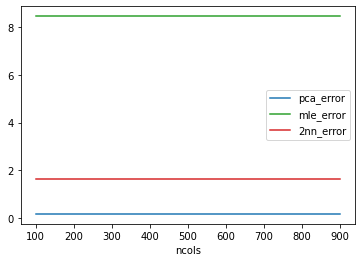

In [ ]:
import matplotlib.pyplot as plt
 
df_cols_change2 = df_cols_change[df_cols_change['dataset_type'] == 'M1_Sphere']
#print(df_cols_change2.head(5))
#
ax = df_cols_change2.plot(x="ncols", y="pca_error")
df_cols_change2.plot(x="ncols", y="mle_error", ax=ax, color="C2")
df_cols_change2.plot(x="ncols", y="2nn_error", ax=ax, color="C3")
#
#plt.plot(x, y)

plt.show()

---
**Comments on the graph:**
For the selected algorithm: PCA, MLE, 2KNN, the square error rate is constant. Hence, for each algorithm, the error in finding the true ID does not depend on the number of features

###### 6.10.2. Eval error for numbers of row changes

In [ ]:
def build_id_rows_change(thruth_table, rows_range, ncols):
  df1 = build_id_eval_features_rows_change(truth, nrows= cols, ncols = cols)
  for val_rows in rows_range:
    df2 = build_id_eval_features_rows_change(thruth_table, nrows= val_rows, ncols = ncols)
    df1 = pd.concat([df1, df2], ignore_index=True)
  return df1

In [ ]:
rows_range = range(100, 1000, 300)
cols= 100
df_rows_change = build_id_rows_change(truth, rows_range, cols)
df_rows_change.head(2)

,dataset_type,Intrinsic Dimension,pca_id,pca_time,pca_error,mle_id,mle_time,mle_error,2nn_id,2nn_time,2nn_error,ncols,nrows
0,M1_Sphere,10,10.42,0.080780,0.1764,7.091910,0.004273,8.456986,8.721443,0.196206,1.634708,100,100
1,M9_Affine,20,15.93,0.103121,16.5649,10.764864,0.004217,85.287743,11.337713,0.198419,75.035211,100,100


* **show the graph nrows vs error rate for the dataset 'M1_Sphere'**

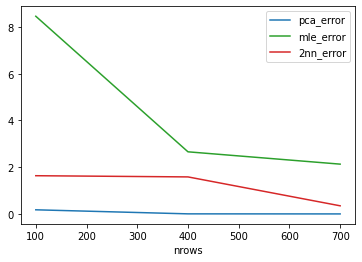

In [ ]:
 #show the nrows vs error rate for the dataset 'M1_Sphere'
df_rows_change_2 = df_rows_change[df_rows_change['dataset_type'] == 'M1_Sphere']

ax = df_rows_change_2.plot(x="nrows", y="pca_error")
df_rows_change_2.plot(x="nrows", y="mle_error", ax=ax, color="C2")
df_rows_change_2.plot(x="nrows", y="2nn_error", ax=ax, color="C3")


plt.show()

---
**Comments on the graph:**
For the selected algorithm: PCA, MLE, 2KNN, the square error rate decreases when the numbers of rows or item increases. That is the more we have data, the better we can determine the true ID value